<a href="https://colab.research.google.com/github/kipronopato/Principal-component-analysis/blob/main/Principal_Component_Aanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

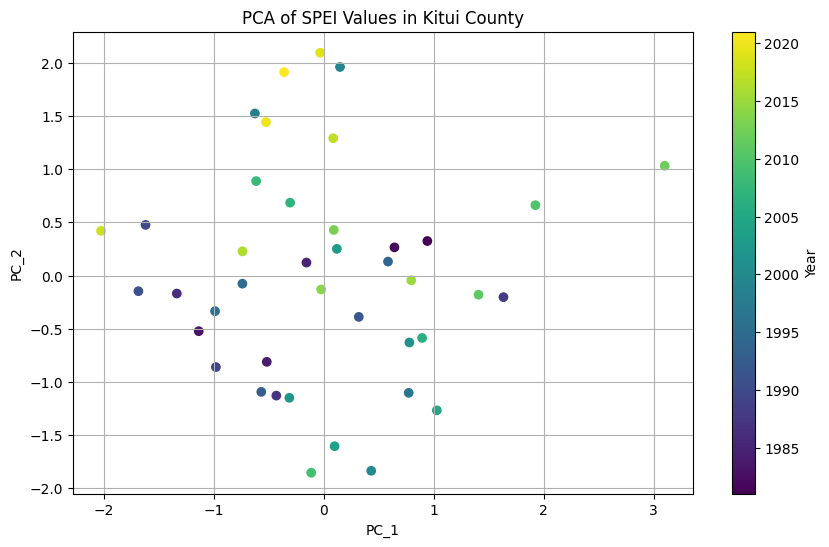

In [ ]:
import pandas as pd
# Load the data from the CSV file
file_path = "/SPEI.csv"
spei_data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
spei_data.head(), spei_data.columns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop the unnecessary column
spei_data_cleaned = spei_data.drop(columns=['Unnamed: 1'])

# Extract the relevant columns for PCA
data_for_pca = spei_data_cleaned[['Standardized SPEI', 'Standardized_Precipitation']]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the Year column for plotting
principal_df['Year'] = spei_data_cleaned['Year']

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PCA of SPEI Values in Kitui County')
plt.grid(True)
plt.show()
